# Decision Trees

## 1.Data Collection

The dataset we use in this notebook is "Banknote Authenication Dataset" by Volker Lohweg ,Helene Darksen. It can be obtained from here https://github.com/TarunNanduri/Artificial-Intelligence/tree/master/DecisionTrees/

In [1]:
import pandas as pd

In [2]:
file = './BankNote_Authentication.csv'
data = pd.read_csv(file)
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
features = data.iloc[:,:-1]
labels = data.iloc[:,-1]

## 2.Data pre-processing

Here we can observe that the attributes are of different scales. So for better prediction let's bring them all to one scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler  = StandardScaler()
features = scaler.fit_transform(features)
features

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

## 3.Spliting the data

Now our data is ready for training the model. Now let's split our data for training and testing purposes into 75% and 25% respectively.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
featureTrain, featureTest, labelTrain, labelTest = train_test_split(features, labels)

In [8]:
print("X_train shape: ",featureTrain.shape)
print("X_test shape: ",featureTest.shape)
print("y_train shape: ",labelTrain.shape)
print("y_test shape: ",labelTest.shape)

X_train shape:  (1029, 4)
X_test shape:  (343, 4)
y_train shape:  (1029,)
y_test shape:  (343,)


## 4.Fitting the model

Now, we are ready with the training and testing data. Now, let's fit the data and check the accuracy of our model

In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(featureTrain,labelTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
pred = model.predict(featureTest)
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n")
print(confusion_matrix(labelTest,pred))
print("\nClassification Report:\n")
print(classification_report(labelTest,pred))


Confusion Matrix:

[[184   6]
 [  1 152]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       0.96      0.99      0.98       153

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(labelTest,pred)

0.9795918367346939

### Whohhh! That's amazing accuracy. Now let's take a look how our decision tree looks like.

In [12]:
model.classes_
classes = [str(i) for i in model.classes_]
classes

['0', '1']

c:\users\chsrs\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


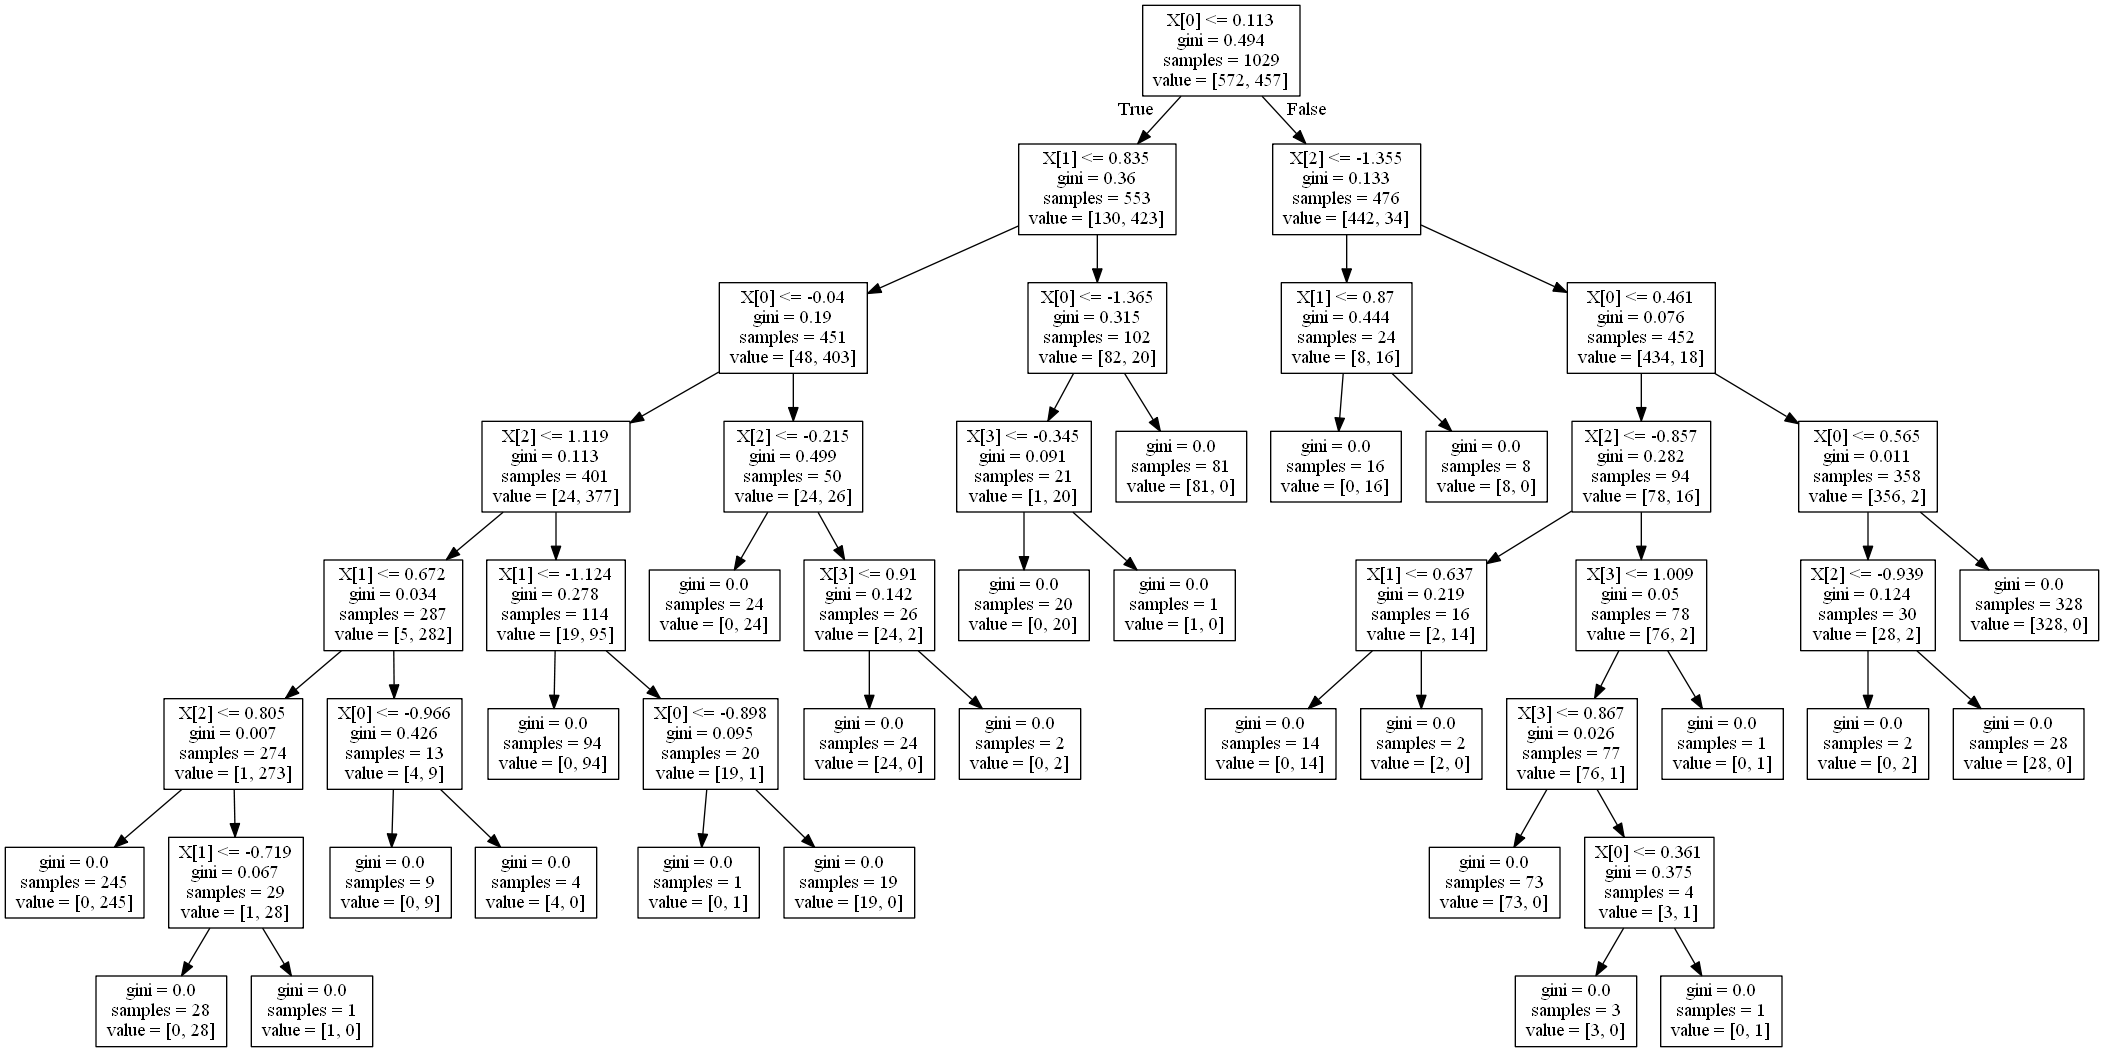

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())